# EECS16A: Homework 10

## Problem 2: Kinematic Model for a Simple Car

This script helps to visualize the difference between a nonlinear model and a corresponding linear approximation for a simple car.  What you should notice is that the linear model is similar to the nonlinear model when you are close to the point where the approximation is made.

In [1]:
''' Problem/Model Setup'''
import numpy as np
import matplotlib.pyplot as plt

# Vehicle Model Constants
L = 1.0  # length of the car, meters
dt = 0.1 # time difference between timestep (k+1) and timestep k, seconds

''' Nonlinear Vehicle Model Update Equation '''
def nonlinear_vehicle_model(initial_state, inputs, num_steps):
    x     = initial_state[0] # x position, meters
    y     = initial_state[1] # y position, meters
    theta = initial_state[2] # heading (wrt x-axis), radians
    v     = initial_state[3] # speed, meters per second
    
    a = inputs[0]            # acceleration, meters per second squared
    phi = inputs[1]          # steering angle, radians
    
    state_history = []       # array to hold state values as the time step k advances.
    state_history.append([x,y,theta,v]) # add the initial state (i.e. k = 0) to history.
    
    for i in range(0, num_steps):
        # Find the next state, at time k+1, by applying the nonlinear model to the current state, at time k.
        x_next     = x     + v * np.cos(theta) * dt
        y_next     = y     + v * np.sin(theta) * dt
        theta_next = theta + v/L * np.tan(phi) * dt
        v_next     = v     + a * dt
        
        # Add the next state to the history.
        state_history.append([x_next,y_next,theta_next,v_next])
        
        # Advance to the next state, at time k+1, to get ready for next loop iteration.
        x = x_next
        y = y_next
        theta = theta_next
        v = v_next
        
    return np.array(state_history)

''' Linear Vehicle Model Update Equation '''
def linear_vehicle_model(A, B, initial_state, inputs, num_steps):
    # Note: A should be a 4x4 matrix, B should be a 4x2 matrix for this linear model.
    
    x     = initial_state[0] # x position, meters
    y     = initial_state[1] # y position, meters
    theta = initial_state[2] # heading (wrt x-axis), radians
    v     = initial_state[3] # speed, meters per second
    
    a = inputs[0]            # acceleration, meters per second squared
    phi = inputs[1]          # steering angle, radians
    
    state_history = []       # array to hold state values as the time step k advances.
    state_history.append([x,y,theta,v]) # add the initial state (i.e. k = 0) to history.
    
    for i in range(0, num_steps):
        # Find the next state, at time k+1, by applying the nonlinear model to the current state, at time k.
        state_next = np.dot(A, state_history[-1]) + np.dot(B, inputs)
                
        # Add the next state to the history.
        state_history.append(state_next)
        
        # Advance to the next state, at time k+1, to get ready for next loop iteration.
        state = state_next
        
    return np.array(state_history)

In [2]:
''' Plotting Setup'''
def make_model_comparison_plot(state_predictions_nonlinear, state_predictions_linear):
    f = plt.figure()
    plt.plot(state_predictions_nonlinear[0,0], state_predictions_nonlinear[0,1], 'go', label='Start')
    plt.plot(state_predictions_nonlinear[:,0], state_predictions_nonlinear[:,1], 'r', label='Nonlinear')
    plt.plot(state_predictions_linear[:,0], state_predictions_linear[:,1], 'k.', label='Linear')
    plt.legend(loc='upper left')
    plt.xlim([4, 8])
    plt.ylim([9, 12])
    plt.show()

**PART A**
TODO: Fill in the matrices A and B for the linear system approximating the nonlinear vehicle model under small heading and steering angle approximations.


In [3]:
A = np.array([[1,0,0,dt], 
              [0,1,0,0], 
              [0,0,1,0], 
              [0,0,0,1]])

B = np.array([[0,0], 
              [0,0], 
              [0,0], 
              [dt,0]])

**PART B**
    
TODO: Your task is to fill out the state and input values from Problem B and look at the resulting plot.  The plot should help you to visualize the difference between using a linear model and a nonlinear model for this specific starting state and input.
    

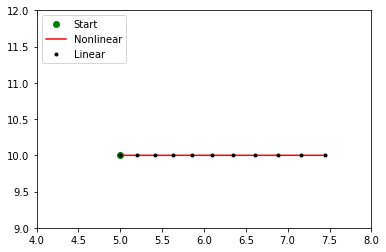

In [4]:
x_init  = 5.0
y_init  = 10.0
theta_init = 0.0
v_init     = 2.0
a_input    = 1.0
phi_input  = 0.0001

state_init = [x_init, y_init, theta_init, v_init]
state_predictions_nonlinear = nonlinear_vehicle_model(state_init, [a_input, phi_input], 10)
state_predictions_linear = linear_vehicle_model(A, B, state_init, [a_input, phi_input], 10)

make_model_comparison_plot(state_predictions_nonlinear, state_predictions_linear)



**PART C**
    
TODO: Your task is to fill out the state and input values from Problem C and look at the resulting plot.  The plot should help you to visualize the difference between using a linear model and a nonlinear model for this specific starting state and input.

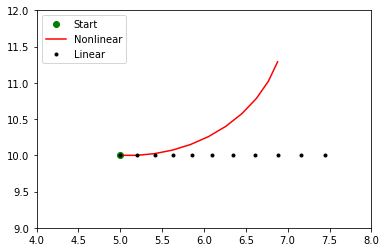

In [5]:
x_init  = 5.0
y_init  = 10.0
theta_init = 0.0
v_init     = 2.0
a_input    = 1.0
phi_input  = 0.5

state_init = [x_init, y_init, theta_init, v_init]
state_predictions_nonlinear = nonlinear_vehicle_model(state_init, [a_input, phi_input], 10)
state_predictions_linear = linear_vehicle_model(A, B, state_init, [a_input, phi_input], 10)

make_model_comparison_plot(state_predictions_nonlinear, state_predictions_linear)

## Problem 7: Image Analysis

In [6]:
def plot_circle(a, d, e):
    """
    You can use this function to plot circles with parameters a,d,e.
    The parameters are described in the homework pdf. 
    
    """
    is_circle = d**2 + e**2 - 4*a > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*(x**2 + y**2) + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Circle")

In [7]:
def plot_ellipse(a, b, c, d, e):
    """
    You can use this function to plot ellipses with parameters a-e.
    The parameters are described in the homework pdf. 
    """
    is_ellipse = b**2 - 4*a*c < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*x**2 + b*x*y + c*y**2 + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Ellipse")

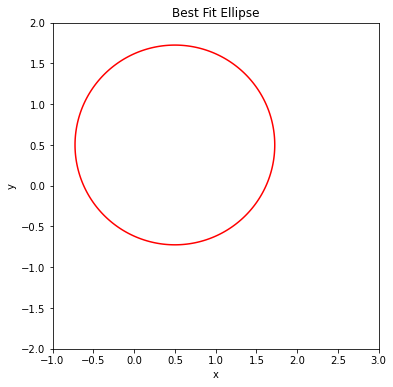

In [8]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse(1, 0, 1, -1, -1)

A = [[ 0.5661  0.3    -0.69  ]
 [ 1.0069  0.5     0.87  ]
 [ 1.5496  0.9    -0.86  ]
 [ 1.7744  1.      0.88  ]
 [ 2.1124  1.2    -0.82  ]
 [ 2.6596  1.5     0.64  ]
 [ 3.24    1.8     0.    ]]

[ 4.87314137 -7.89293482 -0.22651484]


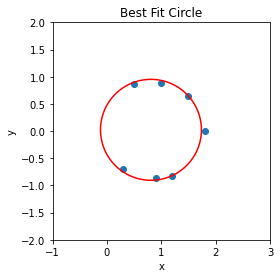

In [9]:
# PART C

xy = np.array([[0.3, -0.69],
               [0.5, 0.87],
               [0.9, -0.86],
               [1, 0.88],
               [1.2, -0.82],
               [1.5, .64],
               [1.8, 0]])
x = xy[:,0]
y = xy[:,1]

# plot the data points
plt.scatter(x,y)

A = np.array([x**2+y**2,x,y]).T # Hint: this generates the A matrix
print("A = {}\n".format(A))
b = np.ones((7,))

circle_params = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
print(circle_params)
plot_circle(circle_params[0],circle_params[1],circle_params[2])



In [10]:
# Computing the error
e = A.dot(circle_params) - b
print("e = {}\n".format(e))
print("||e|| = {}\n".format(np.linalg.norm(e)))
N = 7
print("||e|| / N = {}\n".format(np.linalg.norm(e)/N))

e = [-0.45289988 -0.23676927 -0.35741872 -0.44536583  0.00824421 -0.02376494
  0.58169536]

||e|| = 0.9624339357020364

||e|| / N = 0.13749056224314807



[[ 0.09   -0.207   0.4761  0.3    -0.69  ]
 [ 0.25    0.435   0.7569  0.5     0.87  ]
 [ 0.81   -0.774   0.7396  0.9    -0.86  ]
 [ 1.      0.88    0.7744  1.      0.88  ]
 [ 1.44   -0.984   0.6724  1.2    -0.82  ]
 [ 2.25    0.96    0.4096  1.5     0.64  ]
 [ 3.24    0.      0.      1.8     0.    ]]

[ 4.10382951  0.48711384  4.93938449 -6.85032284 -0.62259259]


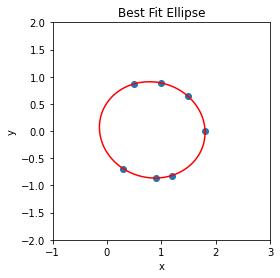

In [11]:
# PART D

# plot the data points
plt.scatter(x,y)

A = np.array([x**2,x*y,y**2,x,y]).T
print("{}\n".format(A))
b = np.ones((7,))


ellipse_params = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
print(ellipse_params)
plot_ellipse(ellipse_params[0],ellipse_params[1],ellipse_params[2],ellipse_params[3],ellipse_params[4])

In [12]:
e = A.dot(ellipse_params) - b
print("e = {}\n".format(e))
print("||e|| = {}\n".format(np.linalg.norm(e)))
N = 7
print("||e|| / N = {}\n".format(np.linalg.norm(e)/N))

e = [-0.00535492  0.00965504 -0.02961637 -0.04065528  0.04157513  0.05047406
 -0.03417349]

||e|| = 0.08997680361065084

||e|| / N = 0.012853829087235836



The code below compares our estimated circle and ellipse with the true ellipse. None of this is required, just an extra comparision between the two 2 estimations

In [13]:
def plot_circle2(a, d, e):
    """
    This plots the true ellipse along with the circle
    that you plot.
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_circle = d**2 + e**2 - 4*a > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*(x**2 + y**2) + d*x + e*y
    f2 = lambda x,y: 3*x*x + .5*x*y + 4*y*y -5*x -.6*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    c2 = plt.contour(x, y, f2(x,y), [1], colors='b')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'${:.2f}(x^2 + y^2) {:+.2f}x {:+.2f}y$'.format(a,d,e))
    
    lines = (c1.collections[0], c2.collections[0])
    labels = ('Least Squares', 'True Ellipse')
    plt.legend(lines, labels, loc='upper right')

In [14]:
def plot_ellipse2(a, b, c, d, e):
    """
    This plots the true ellipse along with the ellipse
    that you plot.
    
    You can comment out the line that starts with `plt.title`
    because this makes assumptions regarding the title of your plot.
    """
    is_ellipse = b**2 - 4*a*c < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*x**2 + b*x*y + c*y**2 + d*x + e*y
    f2 = lambda x,y: 3*x*x + .5*x*y + 4*y*y -5*x -.6*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    c2 = plt.contour(x, y, f2(x,y), [1], colors='b')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'${:.2f}x^2 {:+.2f}xy {:+.2f}y^2 {:+.2f}x {:+.2f}y$'.format(a,b,c,d,e))
    
    lines = (c1.collections[0], c2.collections[0])
    labels = ('Least Squares', 'True Ellipse')
    plt.legend(lines, labels, loc='upper right')

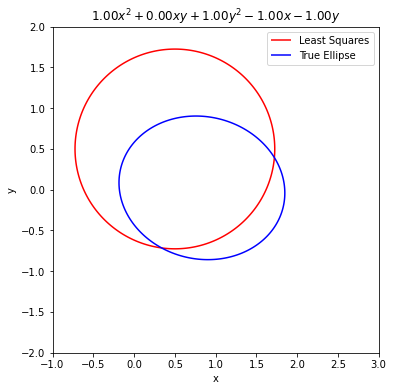

In [15]:
# Here is an example of plot_ellipse2.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse2(1, 0, 1, -1, -1)

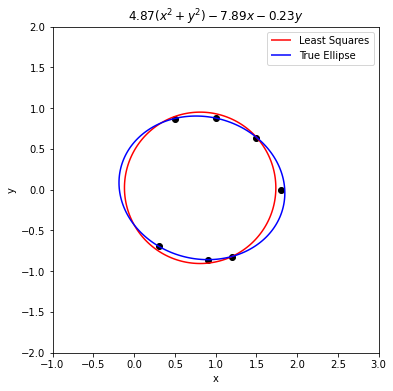

In [16]:
# Circle Model vs True Ellipse
plt.figure(figsize=(6,6))
plot_circle2(circle_params[0],circle_params[1],circle_params[2])
plt.scatter(x,y, color='k')

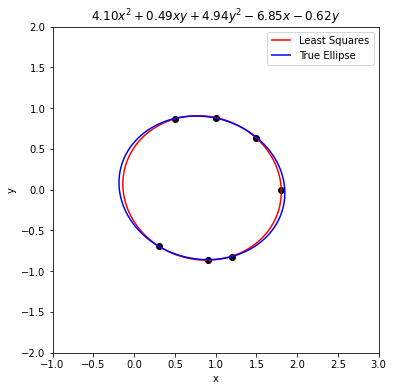

In [17]:
# Ellipse Model vs True Ellipse

plt.figure(figsize=(6,6))
plot_ellipse2(ellipse_params[0],ellipse_params[1],ellipse_params[2],ellipse_params[3],ellipse_params[4])
plt.scatter(x,y,color='k')